In [13]:
import colorednoise as cn
from matplotlib import mlab
from matplotlib import pylab as plt
from scipy.signal import welch
import matplotlib.pyplot as plt
import numpy as np

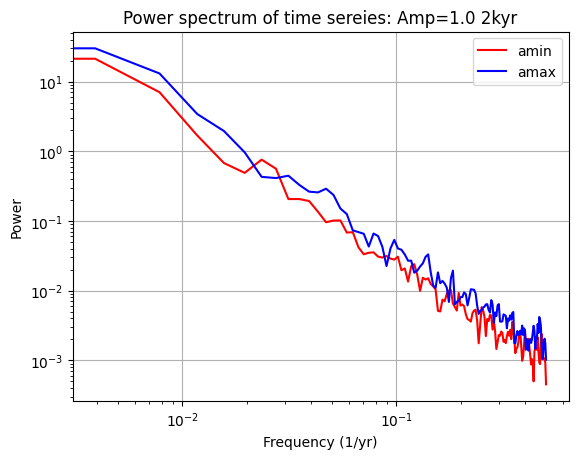

In [ ]:
data = np.loadtxt(
    "/home/kayatroyer/Repositories/brinkmodeltest/amin_amax_timeseries_amp1.0_2000yrs.csv",
    delimiter=",",
    skiprows=1   # <---- skip the header row
)

timesteps = data[:,0]
amin_series = data[:,1]
amax_series = data[:,2]

dt = np.mean(np.diff(timesteps))
freqs_amin, Pxx_amin = welch(amin_series, fs=1.0/dt, nperseg=min(256, len(amin_series)))
freqs_amax, Pxx_amax = welch(amax_series, fs=1.0/dt, nperseg=min(256, len(amin_series)))

plt.figure()
plt.loglog(freqs_amin, Pxx_amin, color = 'red', label = 'amin')
plt.loglog(freqs_amax, Pxx_amax, color = 'blue', label = 'amax')
plt.xlabel("Frequency (1/yr)")
plt.ylabel("Power")
plt.title("Power spectrum of time sereies: Amp=1.0 2kyr")
plt.legend()
plt.grid(True)
plt.show()

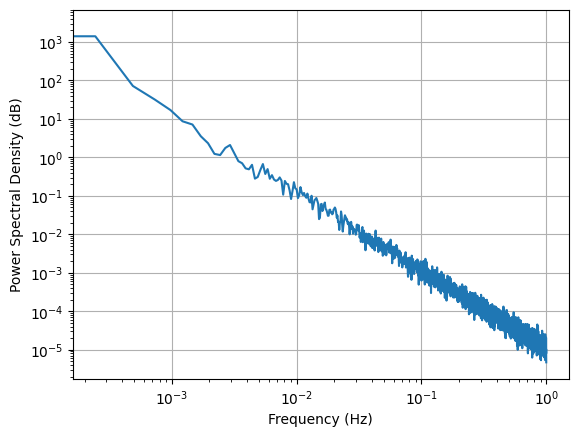

In [14]:
beta = 2 # the exponent
samples = 100000 # number of samples to generate
y = cn.powerlaw_psd_gaussian(beta, samples)

# optionally plot the Power Spectral Density with Matplotlib
s, f = mlab.psd(y, NFFT=2**13)
plt.loglog(f,s)
plt.grid(True)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.show()